# How to resample a dataset through SMOTEENN

In this notebook, I will show you how to resample a dataset using the SMOTEENN technique. This technique is a combination of the SMOTE and Edited Nearest Neighbors (ENN) algorithms. The SMOTEENN technique is used to balance the dataset by oversampling the minority class and undersampling the majority class. This technique is useful when the dataset is imbalanced and the number of samples in the minority class is very low compared to the majority class. Our dataset that we will use in this notebook is the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset from Kaggle. This dataset is highly imbalanced, and we will use the SMOTEENN technique to balance the dataset.

In [41]:
import pandas as pd
from collections import Counter
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

After load, its necessary describe the dataset and understand the actual status of the dataset. The dataset has 31 features, and the target variable is the Class. The Class variable has two values: 0 and 1. The value 1 represents a fraudulent transaction, and the value 0 represents a non-fraudulent transaction. The dataset has 284,807 samples, and only 492 samples are fraudulent transactions. The dataset is highly imbalanced.

In [42]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

print("Distribución inicial de las clases:")
print(df['Class'].value_counts())

Valores faltantes por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Distribución inicial de las clases:
Class
0    284315
1       492
Name: count, dtype: int64


Another way to see the imbalance in the dataset is to plot the distribution of the target variable. We can see that the number of fraudulent transactions is very low compared to the number of non-fraudulent transactions. This imbalance can lead to poor performance of the machine learning model. To start solving this problem, we sparatelly the dataset into features and target variable.

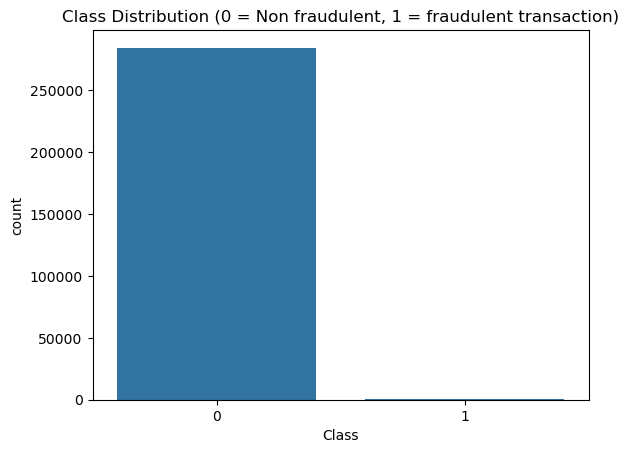

In [43]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non fraudulent, 1 = fraudulent transaction)")
plt.show()

X = df.drop('Class', axis=1)
y = df['Class']

Now with the dataset separated, we can apply the SMOTEENN technique to balance the dataset. The SMOTEENN technique is a combination of the SMOTE and Edited Nearest Neighbors (ENN) algorithms. The SMOTE algorithm is used to oversample the minority class, and the ENN algorithm is used to undersample the majority class. The step by step on SMOTE algorithm is:
  - Select a sample from the minority class.
  - Find the k-nearest neighbors of the sample.
  - Select one of the k-nearest neighbors.
  - Generate a synthetic sample between the sample and the selected neighbor.
  - Repeat the process until the number of samples in the minority class is equal to the number of samples in the majority class.
  
by the other hand, the step by step on ENN algorithm is:
  - Find the k-nearest neighbors of each sample in the dataset.
  - If the sample is misclassified, remove it from the dataset.
  - Repeat the process until no samples are removed from the dataset.
  
The SMOTEENN technique combines the SMOTE and ENN algorithms to balance the dataset. This allows add less sintetic samples than the SMOTE algorithm and remove noisy samples from the majority class. this technique is useful when the dataset is highly imbalanced.

In [44]:
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)

print("Classes distribution after applying SMOTEENN:", Counter(y_res))

Classes distribution after applying SMOTEENN: Counter({1: 275740, 0: 265395})


Although the SMOTEENN technique is more expensive than the  both techniques separately, it is more effective in balancing the dataset. After applying the SMOTEENN technique, we can see that the number of samples in the minority class is equal to the number of samples in the majority class. This balance can improve the performance of the machine learning model.

In the next step, we visualize the classes quantity change by a bar plot. We can see that the number of samples in the minority class is nearly equal to the number of samples in the majority class. 

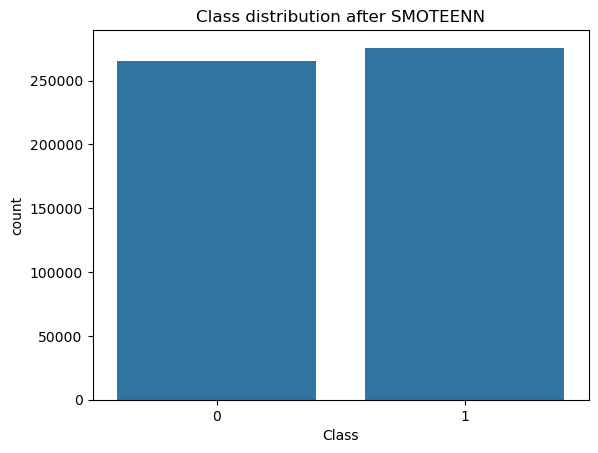

In [45]:
sns.countplot(x=y_res)
plt.title("Class distribution after SMOTEENN")
plt.show()

df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Class'])], axis=1)

Finally, we save the balanced dataset to a CSV file. This balanced dataset could be used to train a machine learning model. The SMOTEENN technique is useful when the dataset is highly imbalanced, and the number of samples in the minority class is very low compared to the majority class.

In [46]:
df_resampled.to_csv('creditcard_fraud_smoteenn.csv', index=False)

print("Balanced dataset successfully saved.")

Balanced dataset successfully saved.
